In [5]:
# Importing the fastai vision library
from fastai.vision import *

In [8]:
path = Path('data/canines')

In [2]:
# Here we set our path to the relevant folder.
path = Path('data/canines')

# Declaring our classes. Only two for this one!
classes = ['puppy', 'adult_dog']

# For every single item we create its folder.
for item in classes:
    folder = item
    file = f'urls/{item}.csv'
    
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    
path.ls()

[PosixPath('data/canines/puppy'),
 PosixPath('data/canines/.ipynb_checkpoints'),
 PosixPath('data/canines/adult_dog'),
 PosixPath('data/canines/urls')]

In [3]:
# Really cranking up my dataset size.
for item in classes:
    download_images(path/f'urls/{item}.csv', path/item, max_pics=1000)

In [4]:
# Checking that the images aren't broken.
for item in classes:
    print(item)
    verify_images(path/item, delete=True, max_size=500)

puppy


adult_dog


In [5]:
np.random.seed(1386)

In [6]:
# Creating our dataset. Validation accounts for 20% of the dataset.
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

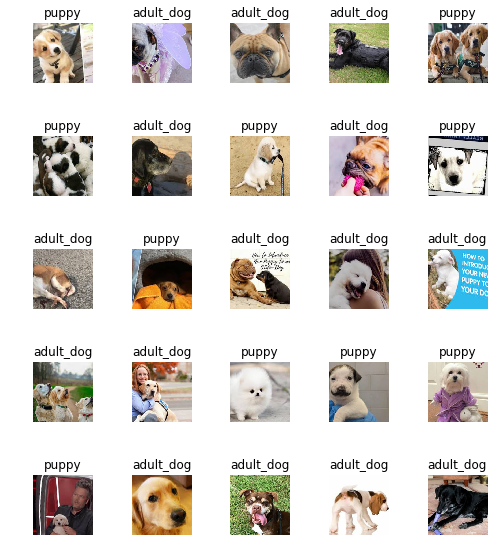

In [8]:
# Making sure that our data isn't overall broken.
data.show_batch(rows=5, figsize=(7,8))

In [9]:
data.classes

['adult_dog', 'puppy']

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
# fitting for six cycles.
learn.fit_one_cycle(6)

# It appears that significantly cranking up the data has provided us at least an 8% increase in accuracy!
# If cleaning can get us down to 20% error I will be more than satisfied.

epoch,train_loss,valid_loss,error_rate,time
0,0.966611,0.735311,0.255000,00:14
1,0.839738,0.735777,0.252500,00:12
2,0.728135,0.596034,0.257500,00:12
3,0.619219,0.552924,0.237500,00:12
4,0.531632,0.556624,0.227500,00:12
5,0.460848,0.540521,0.227500,00:12


In [12]:
# We're making progress. We'll save this for now.
learn.save('stage-1')

In [13]:
doc(learn.unfreeze)

In [14]:
learn.unfreeze()

In [15]:
# Let's see how we did!
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


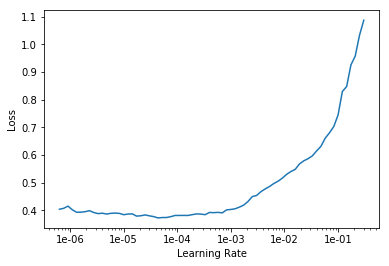

In [16]:
# Plotting the learning rate...
learn.recorder.plot()

In [19]:
# Testing out our learning rate...
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.362488,0.544729,0.230000,00:17
1,0.367316,0.529113,0.225000,00:17
2,0.365385,0.533990,0.222500,00:17


In [20]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
puppy,puppy,puppy,puppy,puppy
Path: data/canines;

Valid: LabelList (400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
puppy,adult_dog,puppy,adult_dog,adult_dog
Path: data/canines;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

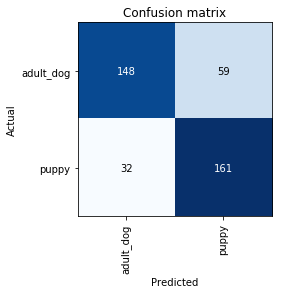

In [22]:
interp.plot_confusion_matrix()

In [3]:
from fastai.widgets import *

In [9]:
db = (ImageList.from_folder(path)
         .split_none()
         .label_from_folder()
         .transform(get_transforms(), size=224)
         .databunch()
     )

In [10]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (2000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
puppy,puppy,puppy,puppy,puppy
Path: data/canines;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/canines;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(

In [26]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [27]:
# Now to begin the tedious process of image cleaning!
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [11]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [ ]:
# 03/26, cleaning the images.
ImageCleaner(ds, idxs, path, duplicates=True)

In [6]:
doc(ImageDataBunch.from_csv)

In [13]:
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv', ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['adult_dog', 'puppy']

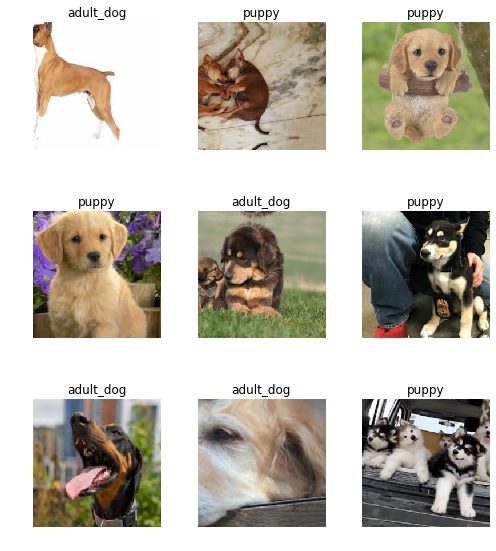

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['adult_dog', 'puppy'], 2, 1532, 382)

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [18]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.127777,0.694437,0.212042,00:13
1,0.918670,0.701617,0.232984,00:12
2,0.777940,0.593363,0.232984,00:11
3,0.668993,0.520344,0.212042,00:11
4,0.573966,0.485153,0.198953,00:11
5,0.508147,0.474961,0.193717,00:11


In [19]:
# We managed to get down to below 20% error!
# We can probably do even better if we get more data, but for this problem it is fine.
learn.save('stage-1')

In [20]:
learn.unfreeze()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


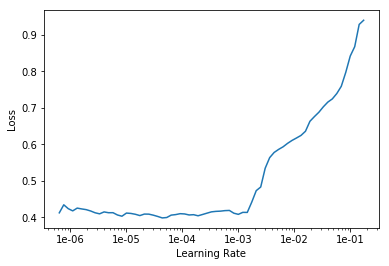

In [22]:
# Error rate looks good from 1e-6 to 5e-4
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(6, max_lr=slice(1e-6, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.397453,0.475062,0.191099,00:16
1,0.414725,0.471723,0.209424,00:16
2,0.379361,0.461758,0.178010,00:16
3,0.350063,0.477426,0.178010,00:16
4,0.317677,0.455700,0.172775,00:16
5,0.280632,0.454753,0.170157,00:16


In [24]:
learn.save('stage-1-1')

In [25]:
learn.load('stage-1-1')

Learner(data=ImageDataBunch;

Train: LabelList (1532 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
puppy,puppy,puppy,puppy,puppy
Path: data/canines;

Valid: LabelList (382 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
adult_dog,puppy,puppy,adult_dog,adult_dog
Path: data/canines;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

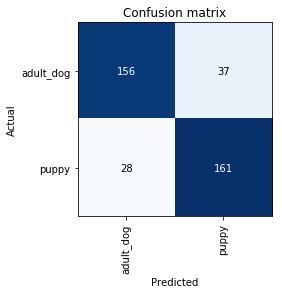

In [27]:
interp.plot_confusion_matrix()

In [28]:
learn.export()

In [29]:
defaults.device = torch.device('cpu')

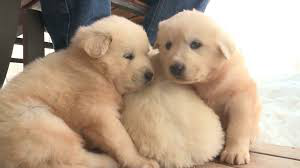

In [30]:
img = open_image(path/'puppy/00000172.jpg')
img

In [31]:
learn = load_learner(path)

In [32]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category puppy